In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
classify=pd.read_csv("CarPrice_Assignment.csv")
print(classify.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [39]:
print(classify.head(),"\n")

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [40]:
print("(rows,columns) = ",classify.shape,"\n")

(rows,columns) =  (205, 26) 



In [41]:
print(classify.isnull().sum(),"\n")

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64 



# Preprocessing the data and data cleaning

In [42]:
print("Number of duplicates : ",classify.duplicated().sum(),"\n")

Number of duplicates :  0 



In [43]:
classify.drop('car_ID',axis=1,inplace=True)


In [44]:
classify.dropna(inplace=True)

# Create a car company variable

In [45]:
classify['car_company'] = classify['CarName'].apply(lambda x: x.split(" ")[0])

# Visualize the data

In [46]:
print(classify.describe(),"\n")

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

In [47]:
print("The price column is the main column and remaining columns are independent variables.\n")


The price column is the main column and remaining columns are independent variables.



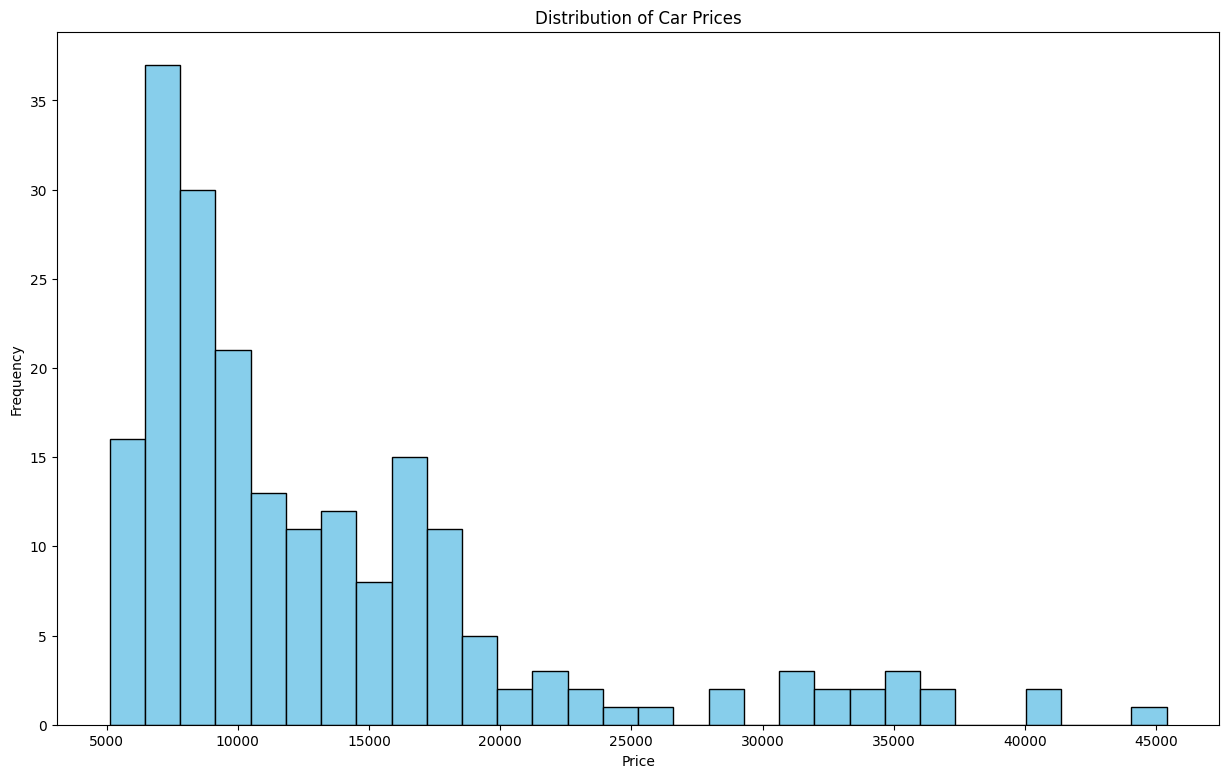

In [48]:
plt.figure(figsize=(15, 9))
plt.hist(classify['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# heatmap of correlation of the data

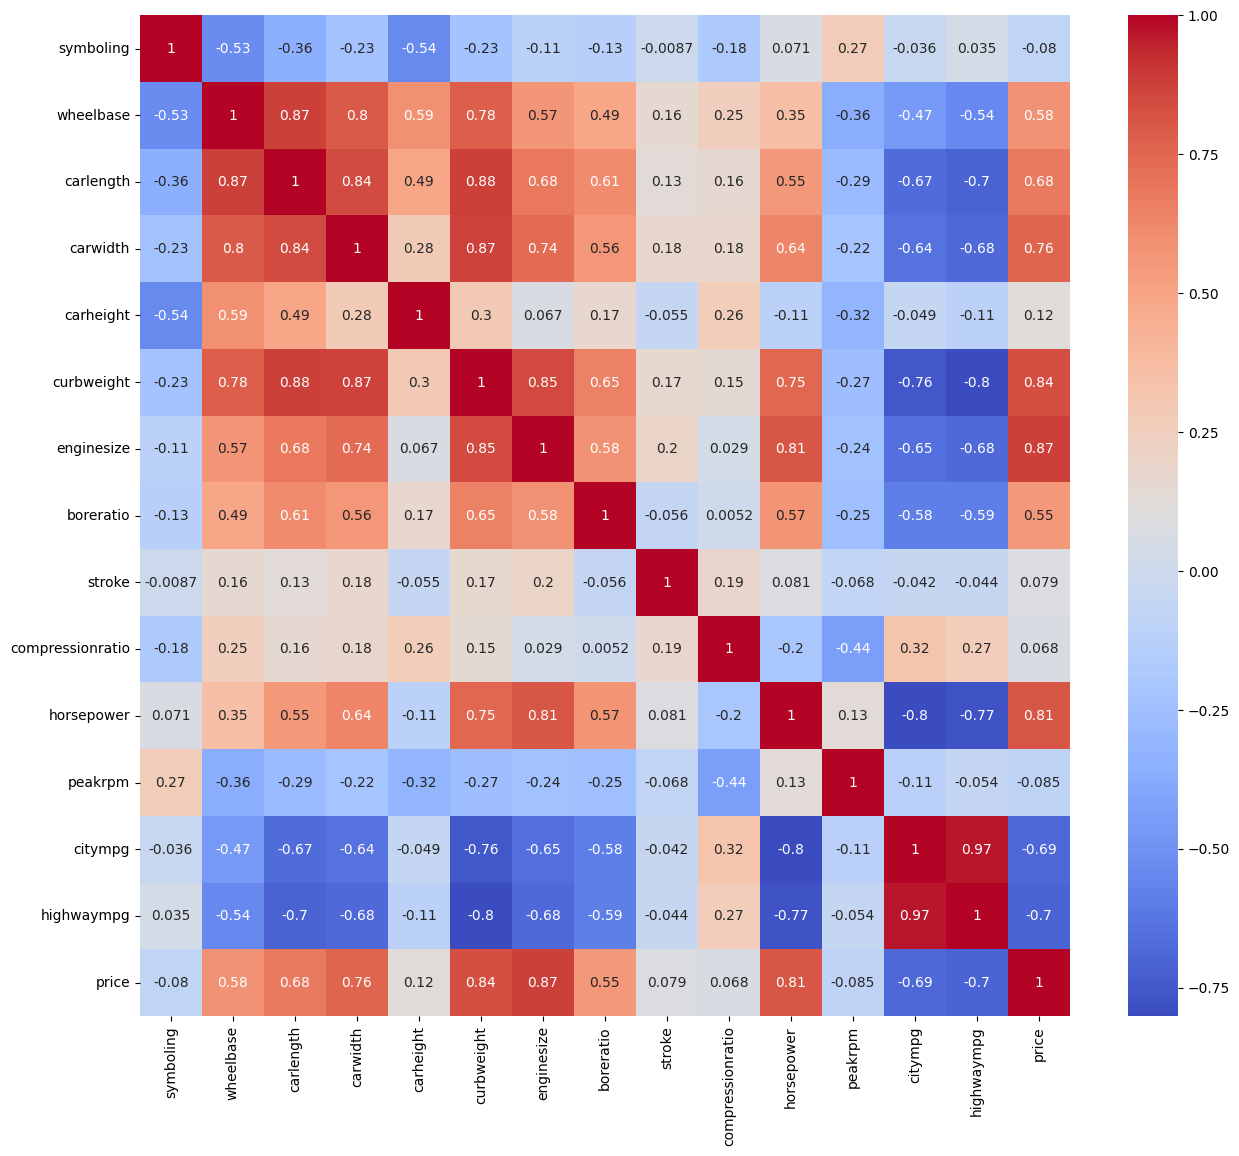

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to calculate the correlation for numeric columns only
numeric_columns = classify.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr = numeric_columns.corr()  # Calculate correlation matrix

plt.figure(figsize=(15, 13))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()


# Feature selection

In [50]:
X = classify.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'car_company']]
y = classify['price']


In [51]:
categorical = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
X = X.drop(list(categorical.columns), axis=1)
X = pd.concat([X,dummies], axis=1)

In [52]:
from sklearn.preprocessing import scale
dat = X.columns
X = pd.DataFrame(scale(X))
X.columns = dat
print(X.columns,"\n")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_alfa-romero',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_ho

# Model selection and training

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Initialize and train the XGBoost model
model = XGBRegressor(random_state=42)

In [55]:
rfecv = RFECV(estimator=model)
X_train_selected = rfecv.fit_transform(X_train, y_train)

In [56]:
print("Optimal number of features:", rfecv.n_features_)

Optimal number of features: 25


In [57]:
model.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
X_test_selected = rfecv.transform(X_test)

In [59]:
y_pred = model.predict(X_test_selected)

In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [61]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5686126.231189988
Mean Absolute Error (MAE): 1536.8066761623475


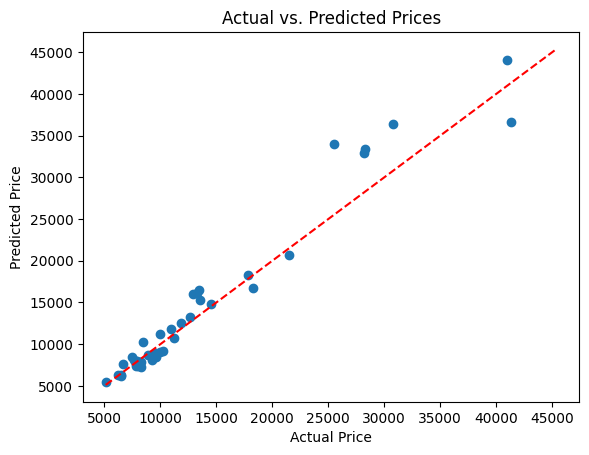

In [62]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [63]:
from sklearn.metrics import r2_score
print("R2 score is ",r2_score(y_true=y_test, y_pred=y_pred),"\n")

R2 score is  0.927972680288759 



In [64]:
print("An R-squared score of 0.92 indicates that is 92% of the variance in the target variable is explained by the model.the model captures a large portion of the variation in the target variable and provides a good fit to the data.\n")

An R-squared score of 0.92 indicates that is 92% of the variance in the target variable is explained by the model.the model captures a large portion of the variation in the target variable and provides a good fit to the data.

